# Backpropagation

With RS and CZT propagation algorithms, a value for z < 0 is available. This means that we are computing backward propagation.

In [1]:
from diffractio import np, plt
from diffractio import um, mm, degrees
from diffractio.diffractio import Diffractio
from diffractio.utils_drawing import draw_several_fields

## X frame

In [2]:
x0 = np.linspace(-250*um, 250*um, 10000)
z0 = np.linspace(0, 500*um, 512)
wavelength = .5*um

Good result: factor 7.80
Good result: factor 7.80


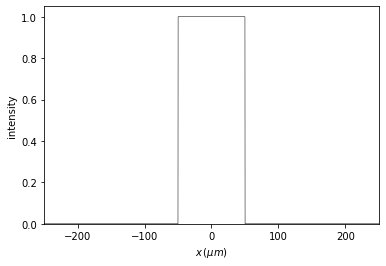

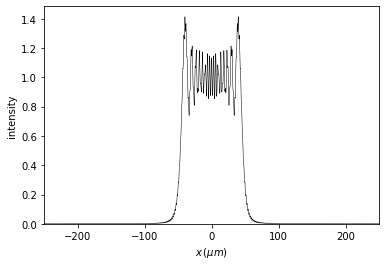

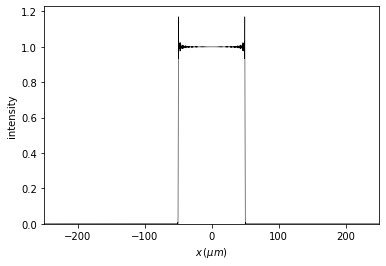

In [3]:
u0 = Diffractio('scalar', 'source', x=x0, wavelength=wavelength)
u0.plane_wave()

t0 = Diffractio('scalar', 'mask', x=x0, wavelength=wavelength)
t0.slit(x0=0, size=100*um)

u1 = t0 * u0
u1.draw()

z_propagation = .3*mm

#Forward propagation
u2 = t0.RS(z=z_propagation, new_field=True, verbose=True)
u2.draw()

u3 = u2.RS(z=-z_propagation, new_field=True, verbose=True)
u3.draw()

# draw_several_fields([u1, u2, u3], titles=['u1', 'u2', 'u3'])

When light escapes from the lateral surface, that is, the intensity output field is not null at the edges, the back-propagated field does not match the input field. 

Good result: factor 854.03
Good result: factor 854.03


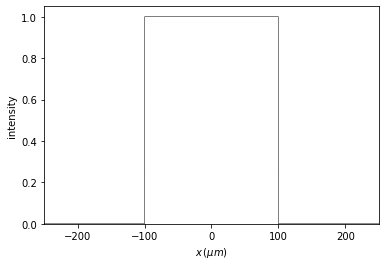

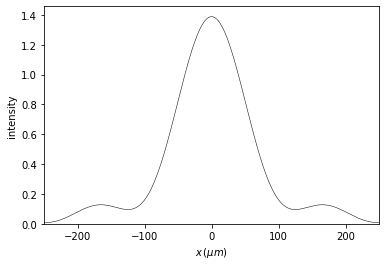

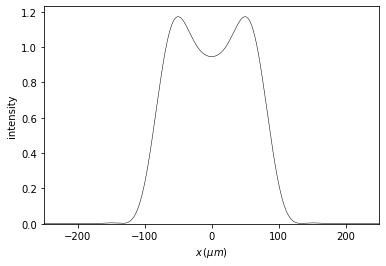

In [4]:
u0 = Diffractio('scalar', 'source', x=x0, wavelength=wavelength)
u0.plane_wave()

t0 = Diffractio('scalar', 'mask', x=x0, wavelength=wavelength)
t0.slit(x0=0, size=200*um)

u1 = t0 * u0
u1.draw()

z_propagation = 50*mm

#Forward propagation
u2 = t0.RS(z=z_propagation, new_field=True, verbose=True)
u2.draw()

u3 = u2.RS(z=-z_propagation, new_field=True, verbose=True)
u3.draw()

# draw_several_fields([u1, u2, u3], titles=['u1', 'u2', 'u3'])

We can obtain similar results with the CZT algorithm

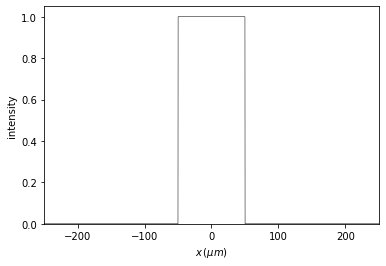

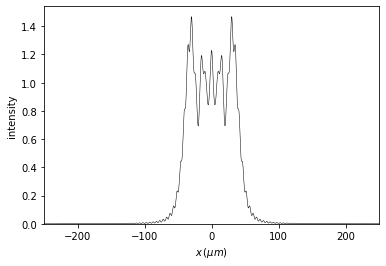

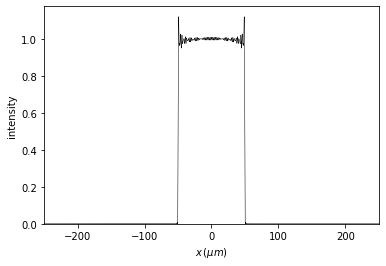

In [5]:
u0 = Diffractio('scalar', 'source', x=x0, wavelength=wavelength)
u0.plane_wave()

t0 = Diffractio('scalar', 'mask', x=x0, wavelength=wavelength)
t0.slit(x0=0, size=100*um)

u1 = t0 * u0
u1.draw()

z_propagation = 1*mm

#Forward propagation
u2 = u1.CZT(z=z_propagation, xout=x0)
u2.draw()

u3 = u2.CZT(z=-z_propagation, xout=x0)
u3.draw()



# XY frame

In [6]:
x0 = np.linspace(-250*um, 250*um, 512)
y0 = np.linspace(-250*um, 250*um, 512)
wavelength = .5*um

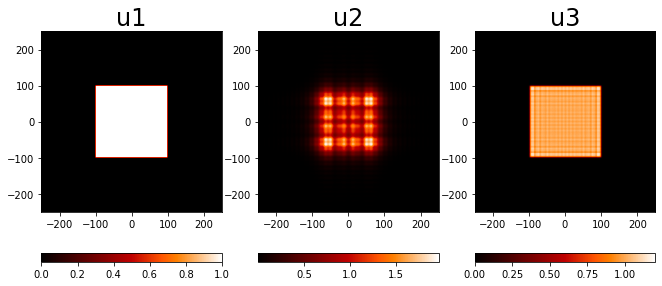

In [7]:
u0 = Diffractio('scalar', 'source', x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Diffractio('scalar', 'mask', x=x0, y=y0,  wavelength=wavelength)
t0.square(r0=(0,0), size=200*um)

u1 = t0 * u0

z_propagation = 5*mm

#Forward propagation
u2 = t0.RS(z=z_propagation, new_field=True, verbose=True)

u3 = u2.RS(z=-z_propagation, new_field=True, verbose=True)

draw_several_fields([u1, u2, u3], titles=['u1', 'u2', 'u3'])

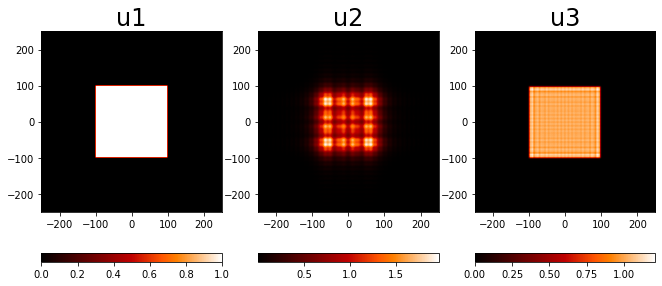

In [8]:
u0 = Diffractio('scalar', 'source', x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Diffractio('scalar', 'mask', x=x0, y=y0,  wavelength=wavelength)
t0.square(r0=(0,0), size=200*um)

u1 = t0 * u0

z_propagation = 5*mm

#Forward propagation
u2 = t0.CZT(z=z_propagation)

u3 = u2.CZT(z=-z_propagation)

draw_several_fields([u1, u2, u3], titles=['u1', 'u2', 'u3'])